# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#cities

653


In [61]:


Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning of Data Retrieval")
print("-----------------------------------")

batch_size = 50   
num = 1
#index1 = 0
for i in range(0, len(cities)+1, batch_size):
    
    
    cities_list = cities[i:i+batch_size]
    
    
#    print(cities_list)

    for index, city in enumerate(cities_list):
    
 #    for index, city in enumerate(cities_list):
        
        try:
            response = requests.get(query_url + city).json()
#            print(response)
        
            print(f"Processed Record {index} of set {num} of |{city}")
            
            Cloudiness.append(response['clouds']['all'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
            Humidity.append(response['main']['humidity'])
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Wind_Speed.append(response['wind']['speed'])
            #print(index)
        except:
            
            print("City not found.Skipping....")
            Cloudiness.append(None)
            Country.append(None)
            Date.append(None)
            Humidity.append(None)
            Lat.append(None)
            Lng.append(None)
            Max_Temp.append(None)
            Wind_Speed.append(None)
    #index = index + 1
    num += 1
   
    
#    display(response)
#    break
    


Beginning of Data Retrieval
-----------------------------------
Processed Record 0 of set 1 of |san jeronimo
Processed Record 1 of set 1 of |mataura
Processed Record 2 of set 1 of |jalu
Processed Record 3 of set 1 of |toyooka
Processed Record 4 of set 1 of |skiathos
Processed Record 5 of set 1 of |sorland
Processed Record 6 of set 1 of |jamestown
Processed Record 7 of set 1 of |maceio
Processed Record 8 of set 1 of |lolua
City not found.Skipping....
Processed Record 9 of set 1 of |xingtai
Processed Record 10 of set 1 of |olafsvik
Processed Record 11 of set 1 of |ushuaia
Processed Record 12 of set 1 of |bambous virieux
Processed Record 13 of set 1 of |kwidzyn
Processed Record 14 of set 1 of |jerantut
Processed Record 15 of set 1 of |hobart
Processed Record 16 of set 1 of |tura
Processed Record 17 of set 1 of |busselton
Processed Record 18 of set 1 of |strezhevoy
Processed Record 19 of set 1 of |arraial do cabo
Processed Record 20 of set 1 of |constitucion
Processed Record 21 of set 1 of

Processed Record 31 of set 4 of |nguruka
Processed Record 32 of set 4 of |vostok
Processed Record 33 of set 4 of |tsiroanomandidy
Processed Record 34 of set 4 of |saleaula
City not found.Skipping....
Processed Record 35 of set 4 of |belushya guba
City not found.Skipping....
Processed Record 36 of set 4 of |maungaturoto
Processed Record 37 of set 4 of |flinders
Processed Record 38 of set 4 of |udachnyy
Processed Record 39 of set 4 of |plettenberg bay
Processed Record 40 of set 4 of |kande
Processed Record 41 of set 4 of |mount gambier
Processed Record 42 of set 4 of |klaksvik
Processed Record 43 of set 4 of |misratah
Processed Record 44 of set 4 of |talnakh
Processed Record 45 of set 4 of |satitoa
City not found.Skipping....
Processed Record 46 of set 4 of |dharchula
Processed Record 47 of set 4 of |lorengau
Processed Record 48 of set 4 of |aracati
Processed Record 49 of set 4 of |amiens
Processed Record 0 of set 5 of |atar
Processed Record 1 of set 5 of |banda aceh
Processed Record 2 o

Processed Record 17 of set 8 of |marsh harbour
Processed Record 18 of set 8 of |naze
Processed Record 19 of set 8 of |cravo norte
Processed Record 20 of set 8 of |ivanava
Processed Record 21 of set 8 of |mezen
Processed Record 22 of set 8 of |altay
Processed Record 23 of set 8 of |wawa
Processed Record 24 of set 8 of |vestbygda
City not found.Skipping....
Processed Record 25 of set 8 of |nizhneyansk
City not found.Skipping....
Processed Record 26 of set 8 of |pevek
Processed Record 27 of set 8 of |quesnel
Processed Record 28 of set 8 of |lobito
Processed Record 29 of set 8 of |letpadan
Processed Record 30 of set 8 of |nantucket
Processed Record 31 of set 8 of |fairbanks
Processed Record 32 of set 8 of |isangel
Processed Record 33 of set 8 of |sangar
Processed Record 34 of set 8 of |meridian
Processed Record 35 of set 8 of |nongstoin
Processed Record 36 of set 8 of |gouyave
Processed Record 37 of set 8 of |general roca
Processed Record 38 of set 8 of |menongue
Processed Record 39 of set

Processed Record 49 of set 11 of |ucluelet
Processed Record 0 of set 12 of |bilma
Processed Record 1 of set 12 of |terrak
Processed Record 2 of set 12 of |la ronge
Processed Record 3 of set 12 of |sydney
Processed Record 4 of set 12 of |manbij
Processed Record 5 of set 12 of |saint-louis
Processed Record 6 of set 12 of |kunnamangalam
Processed Record 7 of set 12 of |kempen
Processed Record 8 of set 12 of |edd
Processed Record 9 of set 12 of |junin
Processed Record 10 of set 12 of |saint-pierre
Processed Record 11 of set 12 of |doctor pedro p. pena
City not found.Skipping....
Processed Record 12 of set 12 of |puerto colombia
Processed Record 13 of set 12 of |paucartambo
City not found.Skipping....
Processed Record 14 of set 12 of |alofi
Processed Record 15 of set 12 of |labuan
Processed Record 16 of set 12 of |lazurne
Processed Record 17 of set 12 of |kota kinabalu
Processed Record 18 of set 12 of |cordoba
Processed Record 19 of set 12 of |tidore
City not found.Skipping....
Processed Re

In [139]:
cities_df1 = pd.DataFrame(cities)
cities_df1 = cities_df.rename(columns = {0:'City'})
cities_df1['Cloudiness'] = ""
cities_df1['Country'] = ""
cities_df1['Date'] = ""
cities_df1['Humidity'] = ""
cities_df1['Lat'] = ""
cities_df1['Lng']= ""
cities_df1['Max Temp'] = ""
cities_df1['Wind Speed'] = ""

cities_df1['Cloudiness']= Cloudiness
cities_df1['Country'] = Country
cities_df1['Date'] = Date
cities_df1['Humidity'] = Humidity
cities_df1['Lat'] = Lat
cities_df1['Lng'] = Lng
cities_df1['Max_Temp'] = Max_Temp
cities_df1[' Wind_Speed'] =  Wind_Speed
#len(cities_df['Country'])
#len(Wind_Speed)

In [266]:

#cities_df1= cities_df1.dropna(how = 'any', axis = 0)
cities_df1.count()
#cities_df1= cities_df1.reset_index(drop = True)
cities_df1.head()
cities_df1.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max_Temp', ' Wind_Speed'],
      dtype='object')

In [161]:
cities_df1.to_csv("../OutPut/cities_result.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [230]:
date_time =cities_df1['Date'][0]

date_year = time.strftime('%m/%d/%Y', time.gmtime(date_time))
date_year

'03/02/2020'

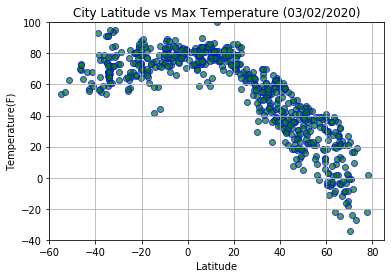

In [234]:
Temperature= cities_df1['Max_Temp']
Latitude = cities_df1['Lat']
plt.scatter(Latitude,Temperature,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-40,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title(f"City Latitude vs Max Temperature ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig1_Lat_Temp.png")

#### Latitude vs. Humidity Plot

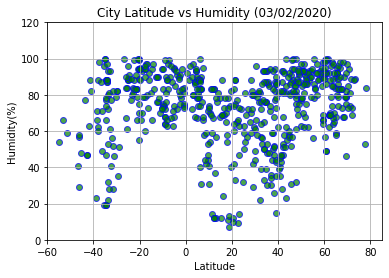

In [272]:
Humidity1 = cities_df1['Humidity']

plt.scatter(Latitude,Humidity1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig2_Lat_Humidity.png")

#### Latitude vs. Cloudiness Plot

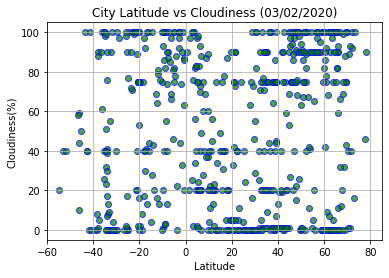

In [251]:
Cloudiness1 = cities_df1['Cloudiness']
plt.scatter(Latitude,Cloudiness1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-5,105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig3_Lat_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

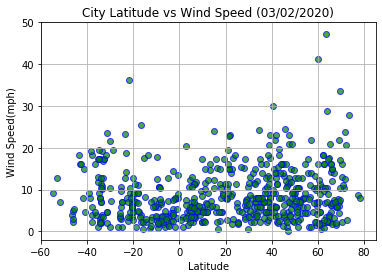

In [271]:
cities_df1.columns = cities_df1.columns.str.strip()
wind_speed1 = cities_df1['Wind_Speed']
plt.scatter(Latitude,wind_speed1,marker='o',edgecolors='b',c='g',alpha = 0.7,linewidths= 1)
plt.xlim(-60,85)
plt.ylim(-2,50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs Wind Speed ({date_year})")
plt.grid()
plt.savefig("../OutPut/Fig4_Lat_WindSpeed.png")
#cities_df1['Wind_Speed']

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [273]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = cities_df1[cities_df1['Lat'] >= 0]
south_hem = cities_df1[cities_df1['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8009325035857974


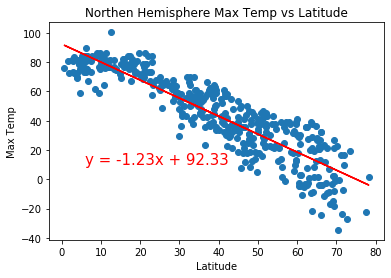

In [279]:
north_hem_temp = north_hem['Max_Temp']
north_hem_lat = north_hem['Lat']
slope_north, intercept_north,rvalue_north, pvalue_north,stderr_north = linregress(north_hem_lat,north_hem_temp)
north_fit = north_hem_lat * slope_north + intercept_north
line_eq = "y = " + str(round(slope_north,2)) + "x + " + str(round(intercept_north,2))
plt.scatter(north_hem_lat,north_hem_temp)
plt.plot(north_hem_lat,north_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northen Hemisphere Max Temp vs Latitude")
plt.savefig("../OutPut/Fig5_north_hem_lat_temp.png")
print(f"The r-squared is : {rvalue_north**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is : 0.1399265782870172


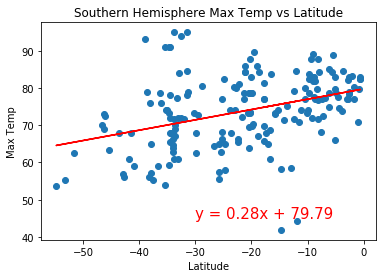

In [285]:
south_hem_temp = south_hem['Max_Temp']
south_hem_lat = south_hem['Lat']
slope_south, intercept_south,rvalue_south, pvalue_south,stderr_south = linregress(south_hem_lat,south_hem_temp)
south_fit = south_hem_lat * slope_south + intercept_south
line_eq = "y = " + str(round(slope_south,2)) + "x + " + str(round(intercept_south,2))
plt.scatter(south_hem_lat,south_hem_temp)
plt.plot(south_hem_lat,south_fit,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere Max Temp vs Latitude")
plt.savefig("../OutPut/Fig6_south_hem_lat_temp.png")
print(f"The r-squared is : {rvalue_south**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0760637520464878


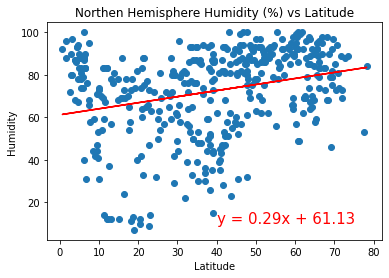

In [287]:
north_hem_humidity = north_hem['Humidity']

slope_north1, intercept_north1,rvalue_north1, pvalue_north1,stderr_north1 = linregress(north_hem_lat,north_hem_humidity)
north_fit1 = north_hem_lat * slope_north1 + intercept_north1
line_eq = "y = " + str(round(slope_north1,2)) + "x + " + str(round(intercept_north1,2))
plt.scatter(north_hem_lat,north_hem_humidity)
plt.plot(north_hem_lat,north_fit1,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northen Hemisphere Humidity (%) vs Latitude")
plt.savefig("../OutPut/Fig7_north_hem_lat_humidity.png")
print(f"The r-squared is : {rvalue_north1**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.15048864052635819


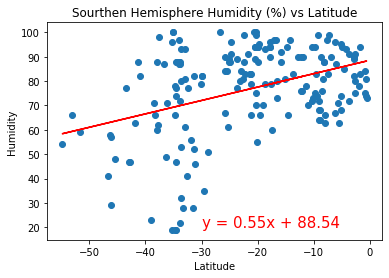

In [290]:
south_hem_humidity = south_hem['Humidity']

slope_south1, intercept_south1,rvalue_south1, pvalue_south1,stderr_south1 = linregress(south_hem_lat,south_hem_humidity)
south_fit1 = south_hem_lat * slope_south1 + intercept_south1
line_eq = "y = " + str(round(slope_south1,2)) + "x + " + str(round(intercept_south1,2))
plt.scatter(south_hem_lat,south_hem_humidity)
plt.plot(south_hem_lat,south_fit1,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Sourthen Hemisphere Humidity (%) vs Latitude")
plt.savefig("../OutPut/Fig8_south_hem_lat_humidity.png")
print(f"The r-squared is : {rvalue_south1**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.05415570117574283


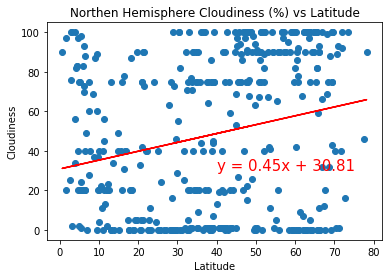

In [292]:
north_hem_cloud = north_hem['Cloudiness']
slope_north2, intercept_north2,rvalue_north2, pvalue_north2,stderr_north2 = linregress(north_hem_lat,north_hem_cloud)
north_fit2 = north_hem_lat * slope_north2 + intercept_north2
line_eq = "y = " + str(round(slope_north2,2)) + "x + " + str(round(intercept_north2,2))
plt.scatter(north_hem_lat,north_hem_cloud)
plt.plot(north_hem_lat,north_fit2,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northen Hemisphere Cloudiness (%) vs Latitude")
plt.savefig("../OutPut/Fig9_north_hem_lat_cloud.png")
print(f"The r-squared is : {rvalue_north2**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08842038727186037


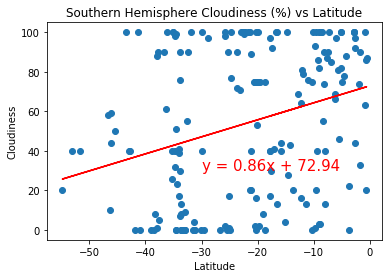

In [294]:
south_hem_cloud = south_hem['Cloudiness']
slope_south2, intercept_south2,rvalue_south2, pvalue_south2,stderr_south2 = linregress(south_hem_lat,south_hem_cloud)
south_fit2 = south_hem_lat * slope_south2 + intercept_south2
line_eq = "y = " + str(round(slope_south2,2)) + "x + " + str(round(intercept_south2,2))
plt.scatter(south_hem_lat,south_hem_cloud)
plt.plot(south_hem_lat,south_fit2,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude")
plt.savefig("../OutPut/Fig10_south_hem_lat_cloud.png")
print(f"The r-squared is : {rvalue_south2**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02115257749743057


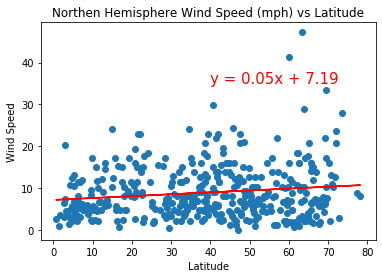

In [297]:
north_hem_wind = north_hem['Wind_Speed']
slope_north3, intercept_north3,rvalue_north3, pvalue_north3,stderr_north3 = linregress(north_hem_lat,north_hem_wind)
north_fit3 = north_hem_lat * slope_north3 + intercept_north3
line_eq = "y = " + str(round(slope_north3,2)) + "x + " + str(round(intercept_north3,2))
plt.scatter(north_hem_lat,north_hem_wind)
plt.plot(north_hem_lat,north_fit3,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northen Hemisphere Wind Speed (mph) vs Latitude")
plt.savefig("../OutPut/Fig11_north_hem_lat_wind.png")
print(f"The r-squared is : {rvalue_north3**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.02115257749743057


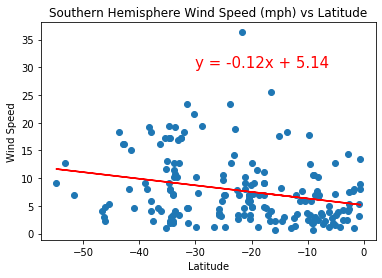

In [300]:
south_hem_wind = south_hem['Wind_Speed']
slope_south3, intercept_south3,rvalue_south3, pvalue_south3,stderr_south3 = linregress(south_hem_lat,south_hem_wind)
south_fit3 = south_hem_lat * slope_south3 + intercept_south3
line_eq = "y = " + str(round(slope_south3,2)) + "x + " + str(round(intercept_south3,2))
plt.scatter(south_hem_lat,south_hem_wind)
plt.plot(south_hem_lat,south_fit3,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Wind Speed (mph) vs Latitude")
plt.savefig("../OutPut/Fig12_south_hem_lat_wind.png")
print(f"The r-squared is : {rvalue_north3**2}")
